### Note to interviewer

This is the first section of data analysis (presented as-is) supporting my writing sample.

In [1]:
import pandas as pd
import seaborn as sns

## Analysis 1: Opinion

Climate opinions show a severe 'this wont affect me' bias in three ways: they think other people should do more about it, they think it will harm the us but not them, they think corporations should do more about it than citizens, to a lesser extent they think the government should do more about it too.

This dataset is county-level from the Yale Climate Climate Communications project measured in 2021.

https://climatecommunication.yale.edu/visualizations-data/ycom-us/

In [2]:
opinions = pd.read_csv('../data/YCOM6.0_2021_Data_.csv.new')

In [3]:
# Drop states, districts, etc
opinions = opinions.loc[opinions['GeoType'] == 'County']
# Drop descriptive columns
opinions = opinions.drop(['GeoType', 'GeoName'], axis=1)
# Fix the parsing of GEOID
opinions = opinions.assign(
    StateFIPS = opinions['GEOID'].astype(str).str.slice(0,2).str.pad(2, 'left','0').str.pad(5, 'right','0'),
    CountyFIPS = opinions['GEOID'].astype(str).str.pad(5, 'left','0'))
# Add new opinion axes
opinions = opinions.assign(
    notmyproblem = opinions['personal'] - opinions['harmUS'],
    notonmyhead = opinions['personal'] - opinions['citizens'],
    marx = opinions['corporations'] - opinions['citizens'],
    laissezfaire = opinions['corporations'] - opinions['president'])

In [4]:
oppose_questions = [x for x in opinions.columns if 'Oppose' in x]
non_questions = ['GEOID', 'TotalPop', 'StateFIPS', 'CountyFIPS']
my_questions = ['marx','laissezfaire','notonmyhead','notmyproblem']
policies = ['fundrenewables', 'regulate', 'CO2limits', 'reducetax','supportRPS','rebates','drillANWROppose','drilloffshoreOppose']
questions = [x for x in opinions.columns if x not in oppose_questions and x not in non_questions and x not in my_questions]

In [5]:
weighted_opinions = pd.concat([opinions[non_questions],
                            opinions.drop(non_questions,axis=1).transform(lambda x: x * opinions['TotalPop'] / 100)],
                            axis=1)

### Opinion Plots

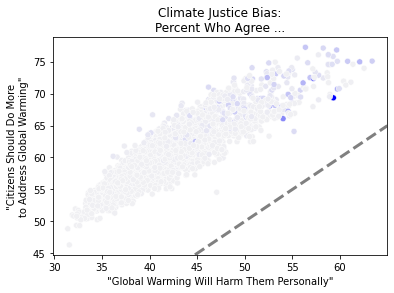

In [8]:
cmap = sns.color_palette("light:b", as_cmap=True)
chart = sns.scatterplot(data=opinions, 
                        x='personal', y='citizens',
                        hue='TotalPop', palette=cmap)
chart.axes.axline((50,50), slope=1, ls='--', linewidth=3, c='grey')
chart.set(title='Climate Justice Bias:\nPercent Who Agree ...',
        xlabel='"Global Warming Will Harm Them Personally"',
        ylabel='"Citizens Should Do More\nto Address Global Warming"')
chart.legend([], [], frameon=False);

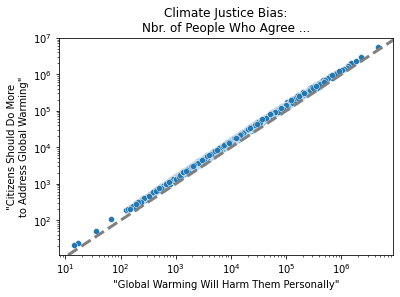

In [9]:
# Results hold when unit of analysis is a person
cmap = sns.color_palette("light:b", as_cmap=True)
chart = sns.scatterplot(data=weighted_opinions, x='personal', y='citizens', palette=cmap)
chart.set(xscale='log', yscale='log')
chart.axes.axline((50,50), (60,60), ls='--', linewidth=3, c='grey')
chart.set(title='Climate Justice Bias:\nNbr. of People Who Agree ...',
        xlabel='"Global Warming Will Harm Them Personally"',
        ylabel='"Citizens Should Do More\nto Address Global Warming"')
chart.legend([], [], frameon=False);